In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Load data tables

In [2]:
cou = pd.read_csv('data/courses.csv')

In [3]:
stu_reg = pd.read_csv('data/studentRegistration.csv')

In [4]:
ass = pd.read_csv('data/assessments.csv')

In [5]:
vle = pd.read_csv('data/vle.csv')

In [6]:
stu_as = pd.read_csv('data/studentAssessment.csv')

In [7]:
stu_vle = pd.read_csv('data/studentVle.csv')

In [8]:
stu_info = pd.read_csv('data/studentInfo.csv')

# Per course

In [9]:
course_sumclicks = stu_vle.groupby(['code_module', 'code_presentation'])['sum_click'].sum()

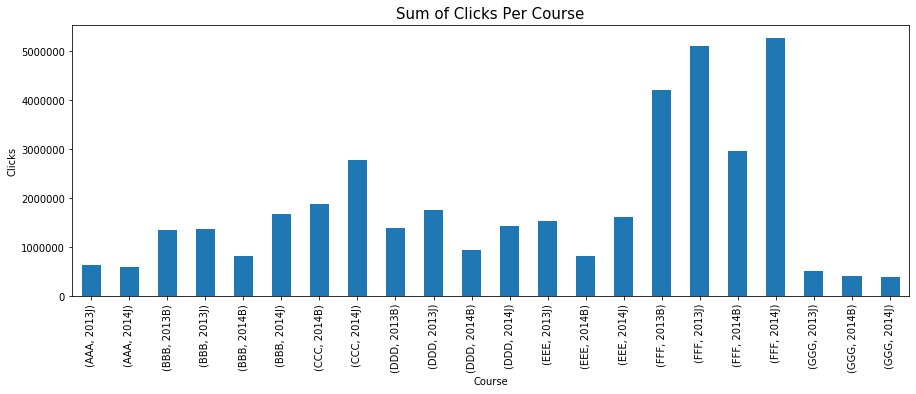

In [10]:
p = course_sumclicks.plot.bar(figsize=(15,5))
p.set_title('Sum of Clicks Per Course', fontsize=15)
p.set_xlabel('Course')
p.set_ylabel('Clicks');

In [11]:
course_countclicks = stu_vle.groupby(['code_module', 'code_presentation'])['sum_click'].count()

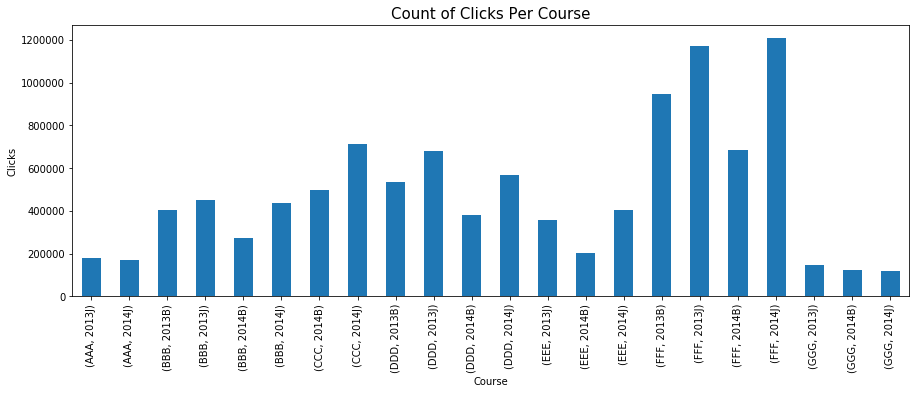

In [12]:
p = course_countclicks.plot.bar(figsize=(15,5))
p.set_title('Count of Clicks Per Course', fontsize=15)
p.set_xlabel('Course')
p.set_ylabel('Clicks');

# Failing Multiple Courses

In [39]:
strg_cnt = stu_reg.groupby(['id_student']).count()

In [44]:
strg_cnt_wd = strg_cnt[strg_cnt.code_presentation > 1][strg_cnt.date_unregistration > 0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [48]:
# Students who enrolled in more than one course, AND withdrew from at least one course
wd_students = strg_cnt_wd.index.values

# Single Course Timeline

In [14]:
stvl_ccc14b = stu_vle[stu_vle.code_module.isin(['CCC'])][stu_vle.code_presentation.isin(['2014B'])]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [15]:
stin_ccc14b = stu_info[stu_info.code_module.isin(['CCC'])][stu_info.code_presentation.isin(['2014B'])]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [16]:
stvl_ccc14b['final_result'] = stvl_ccc14b['id_student'].map(stin_ccc14b.set_index('id_student')['final_result'])

In [17]:
stvl_ccc14b.final_result.replace(to_replace=dict(Pass=1, Distinction=1, Fail=0, Withdrawn=0), inplace=True)

In [18]:
stvl_ccc14b.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,final_result
1917862,CCC,2014B,395164,730135,-18,1,0
1917863,CCC,2014B,395164,729671,-18,4,0
1917864,CCC,2014B,395164,730057,-18,1,0
1917865,CCC,2014B,395164,729819,-18,1,0
1917866,CCC,2014B,394341,729671,-18,5,0


In [77]:
as_ccc14b = ass[ass.code_module.isin(['CCC'])][ass.code_presentation.isin(['2014B'])]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [89]:
ccc14b_duedates = as_ccc14b['date'].sort_values().values.tolist()[:8]

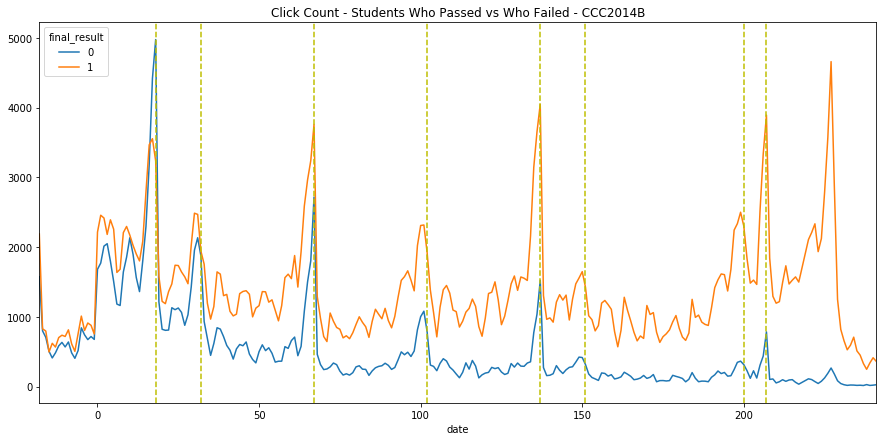

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
stvl_ccc14b.groupby(['date','final_result']).count()['sum_click'].unstack().plot(ax=ax)
for xc in ccc14b_duedates:
    ax.axvline(x=xc, color='y', linestyle='--')
ax.set_title('Click Count - Students Who Passed vs Who Failed - CCC2014B');

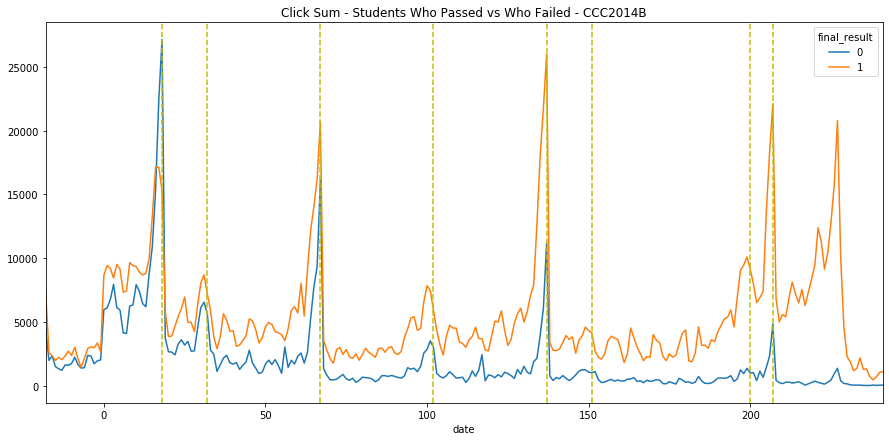

In [93]:
fig, ax = plt.subplots(figsize=(15,7))
stvl_ccc14b.groupby(['date','final_result']).sum()['sum_click'].unstack().plot(ax=ax)
for xc in ccc14b_duedates:
    ax.axvline(x=xc, color='y', linestyle='--')
ax.set_title('Click Sum - Students Who Passed vs Who Failed - CCC2014B');

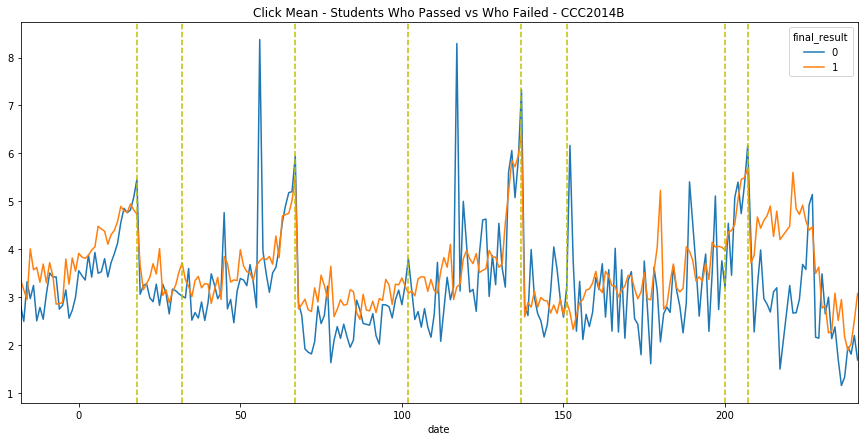

In [94]:
fig, ax = plt.subplots(figsize=(15,7))
stvl_ccc14b.groupby(['date','final_result']).mean()['sum_click'].unstack().plot(ax=ax)
for xc in ccc14b_duedates:
    ax.axvline(x=xc, color='y', linestyle='--')
ax.set_title('Click Mean - Students Who Passed vs Who Failed - CCC2014B');

# Time Series Analysis

In [25]:
stvl_daily = stvl_ccc14b.groupby(['id_student', 'date']).sum()

In [27]:
stvl_daily.drop(['id_site'], axis=1, inplace=True)

In [30]:
stvl_daily.reset_index(inplace=True)

In [54]:
stvl_daily.head()

,id_student,date,sum_click,final_result
0,28418,-5,1,0
1,28418,4,19,0
2,28418,11,52,0
3,28418,14,2,0
4,28418,15,5,0


In [56]:
stvl_cnts = stvl_daily.groupby(['final_result', 'id_student']).count()

Text(0.5, 1.0, '5-day Moving Average')

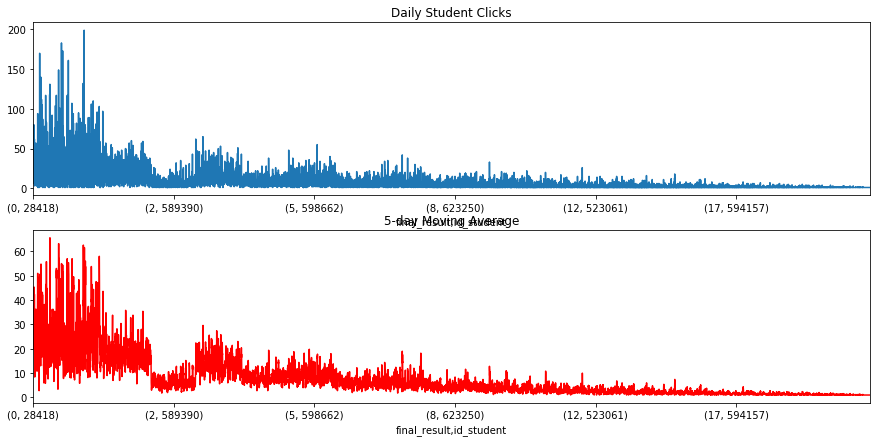

In [58]:
stvl_cnts['5-Day Moving Avg'] = stvl_cnts['sum_click'].rolling(5).mean() 
fig = plt.figure(figsize=(15, 7)) 
ax = fig.add_subplot(2,1,1) 
stvl_cnts['sum_click'].plot(ax=ax) 
ax.set_title('Daily Student Clicks') 
ax = fig.add_subplot(2,1,2) 
stvl_cnts['5-Day Moving Avg'].plot(ax=ax, color='r') 
ax.set_title('5-day Moving Average') 

In [63]:
stvl_daily_avg = stvl_ccc14b.groupby(['date','final_result']).mean()

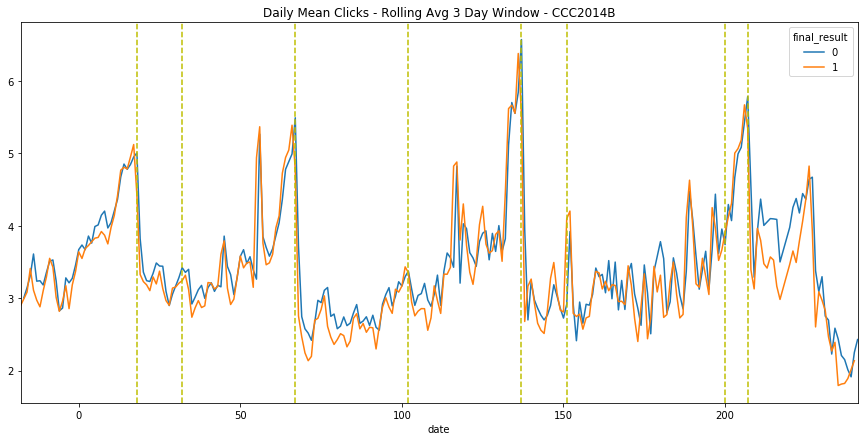

In [102]:
fig, ax = plt.subplots(figsize=(15,7))
stvl_daily_avg['sum_click'].rolling(3, center=True).mean().unstack().plot(ax=ax)
for xc in ccc14b_duedates:
    ax.axvline(x=xc, color='y', linestyle='--')
ax.set_title('Daily Mean Clicks - Rolling Avg 3 Day Window - CCC2014B');

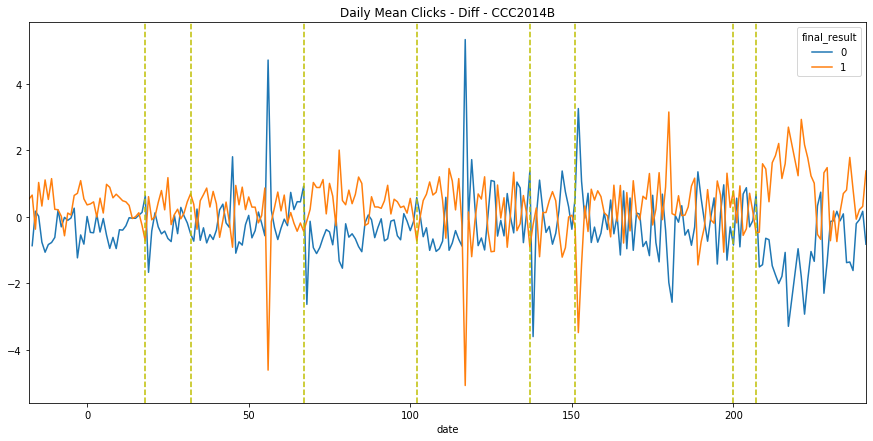

In [97]:
fig, ax = plt.subplots(figsize=(15,7))
stvl_daily_avg['sum_click'].diff().unstack().plot(ax=ax)
for xc in ccc14b_duedates:
    ax.axvline(x=xc, color='y', linestyle='--')
ax.set_title('Daily Mean Clicks - Diff - CCC2014B');

In [103]:
ccc14b_duedates

[18.0, 32.0, 67.0, 102.0, 137.0, 151.0, 200.0, 207.0]